In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
from timeit import default_timer as timer
from tweepy import OAuthHandler

# Gathering Data

In [2]:
#Loading the twitter-archive-enhanced.csv into a DataFrame [WeRateDogs Twitter archive]
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Loading the tweet image predictions from Udacity's servers
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [4]:
image_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key ='XXXX'
consumer_secret ='XXXX'
access_token ='XXXX'
access_secret='XXXX'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count = 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
df_tweet_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as data_file:
    for line in data_file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_tweet_json = df_tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
        columns=['tweet_id', 'retweet_count', 'favorite_count']))
        df_tweet_json = df_tweet_json.reset_index(drop=True)

# Assessing Data

## Assess df

In [7]:
# Display the df table
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


1. Missing data in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, etweeted_status_user_id, retweeted_status_timestamp, expanded_urls

2. Timestamp and retweeted_status_timestamp is an object

3. Source columns have HTML tags

4. This dataset includes retweets, which means there is duplicated data

In [12]:
# checks for duplicated entries in df
df[df.duplicated()].shape[0]

0

In [13]:
df["rating_numerator"].max()

1776

In [14]:
df["rating_denominator"].max()

170

In [15]:
df[df.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
getting          2
actually         2
mad              2
not              2
this             1
unacceptable     1
light            1
life             1
all              1
officially       1
by               1
my               1
his              1
old              1
infuriating      1
such             1
incredibly       1
space            1
Name: name, dtype: int64

In [16]:
df[df.name.str.isupper()].name.value_counts()

JD    1
O     1
Name: name, dtype: int64

Dogs name have 'None', or 'a', or 'an.' or 'O' or 'by' and some more lower case words as names

## Access image_df

In [17]:
# Display the image_df table
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


dog breeds are not consistently in p1,p2,p3 columns i.e lower or uppercase

In [20]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# checks for duplicated entries in image_pred_df
image_df[image_df.duplicated()].shape[0]

0

In [22]:
# Count of duplicate jpg_url
image_df[image_df.jpg_url.duplicated()].shape[0]

66

jpg_url contains duplicate items means duplicate image links

In [23]:
image_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

## Access df_tweet_json

In [25]:
# Display the df_tweet_json table
df_tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7437,35276
1,892177421306343426,5527,30527
2,891815181378084864,3652,22954
3,891689557279858688,7616,38561
4,891327558926688256,8197,36842
5,891087950875897856,2751,18574
6,890971913173991426,1780,10797
7,890729181411237888,16634,59410
8,890609185150312448,3799,25556
9,890240255349198849,6446,29152


In [26]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null object
favorite_count    2331 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


In [27]:
df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7437,35276
1,892177421306343426,5527,30527
2,891815181378084864,3652,22954
3,891689557279858688,7616,38561
4,891327558926688256,8197,36842


In [28]:
df_tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2331,2331,2331
unique,2331,1673,1984
top,870656317836468226,710,0
freq,1,6,163


In [29]:
df_tweet_json.sample(20)

,tweet_id,retweet_count,favorite_count
2323,666055525042405380,213,402
1322,704480331685040129,1032,3293
307,834209720923721728,4607,20112
1353,701601587219795968,436,2033
582,798673117451325440,5507,0
1531,688894073864884227,659,2177
1250,709198395643068416,614,2375
150,861288531465048066,3790,16052
1179,716285507865542656,1008,2682
1395,698342080612007937,930,2196


In [30]:
df_tweet_json[df_tweet_json.duplicated()]

,tweet_id,retweet_count,favorite_count


No Duplicate entries present

## Quality Issues

### df:

1) Missing data in the following columns: in_reply_to_status_id, in_reply_to_user_id, Retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls 

2) This dataset includes retweets, which means there is duplicated data 

3) Timestamp and retweeted_status_timestamp is an object and not correct datetime frame.  

4) The source column still has the HTML tags 

5) Dogs name have 'None', or 'a', or 'an.' and some more lower case words as names 

6) Multiple dog stages occurs such as 'doggo puppo', 'doggo pupper', 'doggo floofer'

### image_df:

1) Dog breeds are not consistently in p1,p2,p3 columns: this column contains dog breeds name starts with upper case or lower case. 

### df_tweet_json:

1) Date type of column tweet_id is an object. It should be an int in order to merge it to the master df.

## Tidiness Issues

### df:

1) The variable for the dog's stage (dogoo, floofer, pupper, puppo) is spread in different columns which should be in one column.

### image_df:

2) This data set is part of the same observational unit as the data in the archive_df 

### df_tweet_json:

3) This data set is also part of the same observational unit as the data in the archive_df 

# Cleaning Data

In [31]:
#Making a copy of the dataframes before cleaning
df_clean = df.copy()
image_df_clean = image_df.copy()
tweet_json_clean = df_tweet_json.copy()

## DEFINE-CODE-TEST

1) Convert the tweet_id in tweet_json_clean dataframe into int type for merging into master dataframe

2) Creates a predicted dog breed column, based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements

3) Create one column for the various dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer' ascolumn name ' type ' with the categorical dtype

4) Merge the copied df_clean, image_df_clean, and tweet_json_clean dataframes

5) Convert the tweet_id in master_df into object type as there is no use for maths operation in tweet_id

6) Replace 'a', 'an', 'the', 'None' and other lower case words with NaN in name column

7) Remove Inconsistency in pred_breed

8) Delete retweets

9) Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

10) Change the timestamp to correct datetime format

11) Removing HTML tags from source column

12) Dog ratings get standardized for denom of 10.

### 1. Convert the tweet_id in tweet_json_clean dataframe into int type for merging into master dataframe

In [32]:
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('int64')

In [33]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null object
favorite_count    2331 non-null object
dtypes: int64(1), object(2)
memory usage: 54.7+ KB


### 2. Creates a predicted dog breed column, based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements

In [34]:
image_df_clean.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1170,736225175608430592,https://pbs.twimg.com/media/CjeY5DKXEAA3WkD.jpg,1,Labrador_retriever,0.399217,True,West_Highland_white_terrier,0.13771,True,cocker_spaniel,0.062033,True


In [35]:
image_df_clean['pred_breed'] = [df['p1'] if df['p1_dog'] == True and df['p1_conf'] > 0.2 
                     else df['p2'] if df['p2_dog'] == True and df['p2_conf'] > 0.2
                     else df['p3'] if df['p3_dog'] == True and df['p3_conf'] > 0.2
                     else np.nan for index, df in image_df_clean.iterrows()]

In [36]:
# Drop 'p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf' columns
image_df_clean.drop(['p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf'], axis = 1, inplace=True)

In [37]:
image_df_clean.head()

,tweet_id,jpg_url,img_num,pred_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


### 3) Create one column for the various dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer' ascolumn name ' type ' with the categorical dtype

In [38]:
#Number of columns in df_clean
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [39]:
# as there are separate columns for dogs type 'doggo','floofer','pupper'and so on...
#i will convert them into one column
df_clean.doggo.replace(np.NaN, '', inplace=True)
df_clean.floofer.replace(np.NaN, '', inplace=True)
df_clean.pupper.replace(np.NaN, '', inplace=True)
df_clean.puppo.replace(np.NaN, '', inplace=True)
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

In [40]:
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [41]:
# Convert the stage in df_clean into categorical dtype
df_clean['stage'] = df_clean['stage'].astype('category')

In [42]:
# drop 'doggo', 'floofer', 'pupper', 'puppo' columns
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
df_clean.stage.replace('', np.nan, inplace=True)

In [43]:
df_clean.info()
df_clean.stage.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         380 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 242.0+ KB


pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
                    0
Name: stage, dtype: int64

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         380 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 242.0+ KB


### 4) Merge the copied df_clean, image_df_clean, and tweet_json_clean dataframes

In [45]:
from functools import reduce
data = [df_clean, image_df_clean, tweet_json_clean]
main_df = reduce(lambda left, right:  pd.merge(left, right,on = 'tweet_id'), data)

In [46]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 19 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
stage                         318 non-null category
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
pred_breed                    1460 non-null object
retweet_count                 2059 

### 5) Convert the tweet_id in master_df into object type as there is no use for maths operation in tweet_id

In [47]:
main_df['tweet_id'] = main_df['tweet_id'].astype('object')

In [48]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 19 columns):
tweet_id                      2059 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
stage                         318 non-null category
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
pred_breed                    1460 non-null object
retweet_count                 2059

### 6. Replace 'a', 'an', 'the', 'None' and other lower case words with NaN in name column

In [49]:
words = main_df[main_df.name.str.islower()].name.unique()

In [50]:
main_df['name'] = main_df['name'].replace(words, np.nan)
main_df['name'] = main_df['name'].replace('None', np.nan)

In [51]:
main_df['name'].dropna()

0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
6              Jax
8             Zoey
9           Cassie
10            Koda
11           Bruno
13             Ted
14          Stuart
15          Oliver
16             Jim
17            Zeke
18         Ralphus
19          Gerald
20         Jeffrey
22          Canela
25            Maya
26          Mingus
27           Derek
28          Roscoe
29         Waffles
30           Jimbo
31          Maisey
32           Lilly
34            Earl
35            Lola
36           Kevin
           ...    
1972          Dook
1974          Hall
1975      Philippe
1978         Reese
1979       Cupcake
1983         Biden
1984          Fwed
1986     Genevieve
1987        Joshwa
1990       Timison
1993      Clarence
1994       Kenneth
1995       Churlie
1996       Bradlay
1997         Pipsy
1999          Gabe
2000         Clybe
2001          Dave
2003          Keet
2005        Klevin
2006         Carll
2011        

In [52]:
main_df.name.value_counts()

Cooper       10
Penny        10
Oliver       10
Tucker       10
Charlie      10
Lucy          9
Sadie         8
Bo            8
Lola          8
Winston       8
Daisy         7
Toby          7
Scout         6
Stanley       6
Koda          6
Milo          6
Bella         6
Jax           6
Dave          6
Rusty         6
Bailey        6
Louis         5
Alfie         5
Oscar         5
Larry         5
Leo           5
Buddy         5
Chester       5
Sophie        4
Bear          4
             ..
Barney        1
Strider       1
Miguel        1
Ridley        1
Chaz          1
Kota          1
Mairi         1
Enchilada     1
Mattie        1
Brudge        1
Noosh         1
Bodie         1
Huck          1
Alexander     1
Mojo          1
Venti         1
Schnozz       1
Howie         1
Bode          1
Keurig        1
Rodney        1
Lilah         1
Nida          1
Pawnd         1
Shawwn        1
Samsom        1
Harrison      1
Reagan        1
Burt          1
Lucky         1
Name: name, Length: 911,

### 7) Delete Retweets

In [53]:
# Delete the rows which contains retweets
main_df = main_df.drop(main_df[(main_df['in_reply_to_status_id'].isnull() == False) | (main_df['retweeted_status_id'].isnull() == False)].index)

In [54]:
main_df.shape[0]

1964

In [55]:
main_df.shape

(1964, 19)

### 8) Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

In [56]:
# drop the reply status and retweet status columns
main_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1, inplace=True)

In [57]:
main_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage', 'jpg_url',
       'img_num', 'pred_breed', 'retweet_count', 'favorite_count'],
      dtype='object')

In [58]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 14 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1342 non-null object
stage                 302 non-null category
jpg_url               1964 non-null object
img_num               1964 non-null int64
pred_breed            1395 non-null object
retweet_count         1964 non-null object
favorite_count        1964 non-null object
dtypes: category(1), int64(3), object(10)
memory usage: 217.1+ KB


### 9) Change the timestamp to correct datetime format

In [59]:
main_df['timestamp'].sample(5)

842     2016-06-17 00:05:25 +0000
1991    2015-11-19 03:10:02 +0000
198     2017-03-23 18:07:10 +0000
596     2016-09-21 17:42:10 +0000
1038    2016-03-17 00:58:46 +0000
Name: timestamp, dtype: object

In [60]:
main_df['timestamp'] = pd.to_datetime(main_df['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [61]:
main_df['timestamp'].sample(5)

260    2017-02-16 17:00:25
1887   2015-11-24 03:29:51
64     2017-06-23 16:00:04
344    2017-01-12 00:55:47
363    2017-01-05 21:29:55
Name: timestamp, dtype: datetime64[ns]

In [62]:
main_df['timestamp'].describe()

count                    1964
unique                   1964
top       2016-08-04 22:52:29
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

### 10) Removing HTML tags from source column

In [63]:
href = main_df["source"].str.split('"', expand = True)
main_df["source"] = href[1]

In [64]:
main_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,pred_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,7437,35276
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,5527,30527
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,3652,22954
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,7616,38561
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,8197,36842


In [65]:
href

,0,1,2,3,4
0,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
1,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
2,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
3,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
4,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
5,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
6,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
7,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
8,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
9,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>


In [66]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 14 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1342 non-null object
stage                 302 non-null category
jpg_url               1964 non-null object
img_num               1964 non-null int64
pred_breed            1395 non-null object
retweet_count         1964 non-null object
favorite_count        1964 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(9)
memory usage: 217.1+ KB


In [67]:
main_df.describe()

,rating_numerator,rating_denominator,img_num
count,1964.000000,1964.000000,1964.000000
mean,12.223014,10.479124,1.202138
std,41.708155,6.865424,0.559615
min,0.000000,2.000000,1.000000
25%,10.000000,10.000000,1.000000
50%,11.000000,10.000000,1.000000
75%,12.000000,10.000000,1.000000
max,1776.000000,170.000000,4.000000


### 12. Standardize dog ratings

In [68]:
ratings = main_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [69]:
main_df.rating_numerator = ratings
main_df['rating_numerator'] = main_df['rating_numerator'].astype('float64')

In [70]:
# standardizing to a denominator of 10 for groups of dogs:

rating_num = [int(round(num/(denom/10)))  if denom != 10 and num/denom <= 2 
                           else num for num, denom in zip(main_df['rating_numerator'], main_df['rating_denominator'])]
rating_denom = [10 if denom != 10 and num/denom <= 2
                             else denom for num, denom in zip(main_df['rating_numerator'], main_df['rating_denominator'])]
main_df['rating_numerator'] = rating_num
main_df['rating_denominator'] = rating_denom

main_df = main_df.drop(main_df[((main_df['rating_denominator'] != 10) | (main_df['rating_numerator'] > 20))].index)

In [71]:
main_df['rating_numerator'].unique()

array([ 13.  ,  12.  ,  14.  ,  13.5 ,  11.  ,   6.  ,  10.  ,   0.  ,
         9.75,   5.  ,  11.27,   3.  ,   7.  ,   8.  ,   9.  ,   4.  ,
         2.  ,  11.26,   1.  ])

In [72]:
main_df['rating_denominator'].unique()

array([10])

# Storing, Analyzing, and Visualizing Data

In [73]:
# storing main dataframe as csv
main_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [74]:
# read twitter_archive_master.csv
df1 = pd.read_csv('twitter_archive_master.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 14 columns):
tweet_id              1961 non-null int64
timestamp             1961 non-null object
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null float64
rating_denominator    1961 non-null int64
name                  1340 non-null object
stage                 302 non-null object
jpg_url               1961 non-null object
img_num               1961 non-null int64
pred_breed            1394 non-null object
retweet_count         1961 non-null int64
favorite_count        1961 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 214.6+ KB


In [75]:
df1.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
count,1.961000e+03,1961.000000,1961.0,1961.000000,1961.000000,1961.000000
mean,7.358030e+17,10.528700,10.0,1.202448,2385.981642,8108.614482
std,6.745542e+16,2.179024,0.0,0.559987,4269.800622,11936.349859
min,6.660209e+17,0.000000,10.0,1.000000,11.000000,69.000000
25%,6.758457e+17,10.000000,10.0,1.000000,530.000000,1738.000000
50%,7.087111e+17,11.000000,10.0,1.000000,1154.000000,3648.000000
75%,7.877176e+17,12.000000,10.0,1.000000,2722.000000,10122.000000
max,8.924206e+17,14.000000,10.0,4.000000,75085.000000,151947.000000


## What are the 10 most frequent dog names?

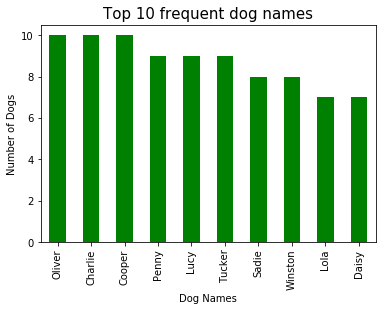

In [84]:
df1['name'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar', color= 'green')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Dog Names')
plt.plot();

##### Most of the dogs are of names: OLiver,Charlie, Cooper, Penny, Lucy, Tucker, Sadie, Winston, Lola, Daisy

Also, check the count below:

In [77]:
#Top 10 frequent dog names
df1['name'].value_counts()[0:10].sort_values(ascending=False)

Oliver     10
Charlie    10
Cooper     10
Penny       9
Lucy        9
Tucker      9
Sadie       8
Winston     8
Lola        7
Daisy       7
Name: name, dtype: int64

## What are the 10 most frequent predicted dog breeds?

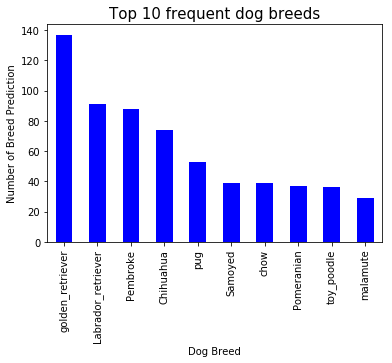

In [89]:
df1['pred_breed'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar', color= 'blue')
plt.ylabel('Number of Breed Prediction')
plt.title('Top 10 frequent dog breeds', size=15)
plt.xlabel('Dog Breed')
plt.plot();

##### Most of the dogs have golden retriever, labrador retriever as a breed which all are rated

In [79]:
#Top 10 frequent dog breeds
df1['pred_breed'].value_counts()[0:10].sort_values(ascending=False)

golden_retriever      137
Labrador_retriever     91
Pembroke               88
Chihuahua              74
pug                    53
Samoyed                39
chow                   39
Pomeranian             37
toy_poodle             36
malamute               29
Name: pred_breed, dtype: int64

# Findings of the analysis

1) The pred_breed column is created based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements

2) Based on dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer', only one categorical column is created named as 'stage'

3) tweet_id is set as object type as it is not going to use for calculation.

4) A main dataframe is created using df_clean, image_df_clean, and tweet_json_clean dataframes

5) Dog Names Issue got rectified

6) Inconsistency in pred_breed got removed

7) All retweets get deleted to get unique tweets

8) The columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp is removed which is not needed

9) Timestamp format got corrected to datetime format

10) Extra HTML tags from source column get refracted

11) Dog ratings get standardized for denom of 10.

In [80]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0